In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, jaccard_score
from sklearn import metrics 
import itertools
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
#df.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ADDRTYPE      SEVERITYDESC                  
Alley         Injury Collision                     82
              Property Damage Only Collision      669
Block         Injury Collision                  30096
              Property Damage Only Collision    96830
Intersection  Injury Collision                  27819
              Property Damage Only Collision    37251
No Location   Injury Collision                    191
              Property Damage Only Collision     1735
Name: SEVERITYCODE, dtype: int64


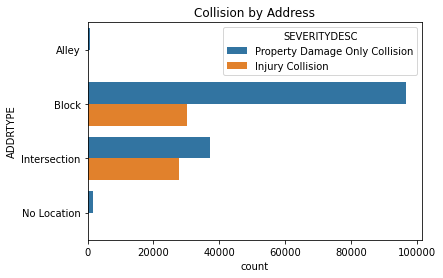

In [24]:
df["ADDRTYPE"].replace(np.nan, "No Location", inplace=True)
df.sort_values("ADDRTYPE", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
print(df.groupby(['ADDRTYPE', 'SEVERITYDESC']).count()['SEVERITYCODE'])
import seaborn as sns
sns.countplot(y = 'ADDRTYPE', hue = 'SEVERITYDESC', data = df)
plt.title('Collision by Address')
plt.show()



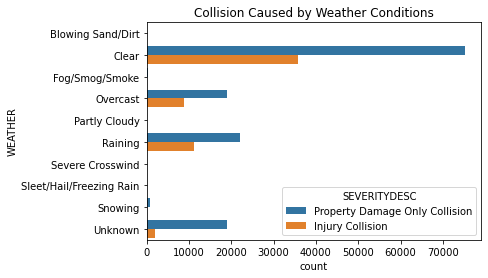

In [28]:
df["WEATHER"].replace(np.nan, "Unknown", inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df.sort_values("WEATHER", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
sns.countplot(y = 'WEATHER', hue = 'SEVERITYDESC',  data= df,orient="v")
plt.title('Collision Caused by Weather Conditions')
plt.show()



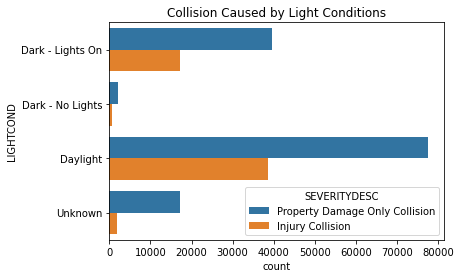

In [29]:
df["LIGHTCOND"].replace(np.nan, "Unknown", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)

df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark - No Lights", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark - No Lights", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark - No Lights", inplace=True)

df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark - Lights On", inplace=True)
df["LIGHTCOND"].replace("Dusk", "Dark - Lights On", inplace=True)
df["LIGHTCOND"].replace("Dawn", "Dark - Lights On", inplace=True)
df.sort_values("LIGHTCOND", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')


sns.countplot(y = 'LIGHTCOND', hue = 'SEVERITYDESC', data = df,orient="v")
plt.title('Collision Caused by Light Conditions')
plt.show()

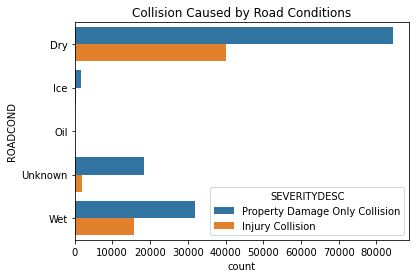

In [31]:
df["ROADCOND"].replace(np.nan, "Unknown", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)

df["ROADCOND"].replace("Sand/Mud/Dirt", "Dry", inplace=True)

df["ROADCOND"].replace("Snow/Slush", "Ice", inplace=True)
df["ROADCOND"].replace("Standing Water", "Wet", inplace=True)
df.sort_values("ROADCOND", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')
sns.countplot(y = 'ROADCOND', hue = 'SEVERITYDESC',  data = df,orient="v")
plt.title('Collision Caused by Road Conditions')
plt.show()